In [39]:
import pandas as pd
import pandas.io.data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
# do all our graphics inline

plt.style.use('seaborn-darkgrid')
# %matplotlib inline



# Set some pandas options
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10) 
pd.set_option('display.width', 100) 
pd.set_option('precision', 3)



plotPath = "C:\Users\Rig\PycharmProjects\ML_finance\Plots/"
def fillAndSavePlot(title, x=False, y=False,suptitle = False,legendLOC = 2):
    if suptitle == True:
        plt.suptitle(suptitle, fontsize = 25,fontweight="bold")
    else:
        plt.title(title, fontsize = 25,fontweight="bold")
        if type(x) == str:
            plt.xlabel(x,fontsize = 18)
        if type(y) == str:
            plt.ylabel(y, fontsize = 18)

    plt.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    plt.legend(loc = legendLOC)
    plt.tight_layout()
    path = plotPath
    plt.savefig(plotPath+title+".png", bbox_inches='tight', dpi = 300)
    
def fillAndSavePlot1(name, title, x=False, y=False,suptitle = False,legendLOC = 2):
    if suptitle == True:
        plt.suptitle(suptitle, fontsize = 25,fontweight="bold")
    else:
        name.set_title(title, fontsize = 25,fontweight="bold")
        if type(x) == str:
            name.set_xlabel(x,fontsize = 18)
        if type(y) == str:
            name.set_ylabel(y, fontsize = 18)

    name.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
    name.legend(loc = legendLOC)
    plt.tight_layout()
    path = plotPath
    plt.savefig(plotPath+title+".png", bbox_inches='tight', dpi = 300)

# Fetching stock data from Yahoo!

Grabbin hsitorical quotes for Microsoft (MSFT) from the year 2012-2014

In [40]:
start = datetime.date(2012, 1, 1)
end = datetime.date(2014, 12, 31)
msft = pd.io.data.DataReader('MSFT', "yahoo", start, end)
msft[:5];

# Explanation of Features
## Volume
Volume refers to no. of shares that exchange from buyer to seller in a given period of time.<br />
The value tells us how frequently the stocks are traded. <br />
<br />
Volume coupled with increase in share price can be used to forecast if stock goes up or down. 
### High Volume (Frequently traded stocks)
+ <br />
(Volume AND Stock Price) ↑ <br />
Volume (constant) AND Stock Price ↓ <br />
Increasing price and decreasing volume show lack of interest and this is a warning of a potential reversal. <br />
 A price drop (or rise) on large volume is a stronger signal that something in the stock has fundamentally changed.

# Some Notes


In [41]:
# Grabbing stock quotes from each stock ticker and store it in a single dataframe

In [42]:
# retrieves the historical prices for a list of stocks
def get(tickers, start, end):
    def data(ticker):
        return pd.io.data.DataReader(ticker, 'yahoo', 
                                     start, end)
        
    datas = map(data, tickers)
    
    return pd.concat(datas, keys=tickers, 
                     names=['Ticker', 'Date'])

In [43]:
# get data for the following stocks
tickers = ['AAPL', 'MSFT', 'GE', 'IBM', 'AA', 'DAL', 'UAL', 'PEP', 'KO']
all_data = get(tickers, start, end)
all_data[:5];

# Fetching Index data from Yahoo!

Grabbing S&P 500 data 

In [44]:
# get daily S&P 500 info
sp_500 = pd.io.data.DataReader("^GSPC", "yahoo", start, end)
sp_500[:5];

# Visualizing financial time-series data

## Plotting closing prices

Need to rewrirte <br />

Most of the examples will focus on the adjusted closing price instead of the close <br />
price as this takes into account splits and dividends and reflects a continuous change<br />
in the value of each stock. To facilitate the use of this field, we can extract just the<br />
adjusted close value for each stock into its own pandas object.<br />

In [45]:
# reset the index to make everything columns
just_closing_prices = all_data[['Adj Close']].reset_index()
just_closing_prices[:5];

In [46]:
# now pivot Date to the index, Ticker values to columns


# DataFrame containing one column per distinct item value indexed by timestamps in the date column.
# DataFrame’s pivot method performs exactly this transformation


# In [117]: pivoted = ldata.pivot('date', 'item', 'value')
daily_close_px = just_closing_prices.pivot('Date', 
                                           'Ticker', 
                                           'Adj Close')
daily_close_px[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL
Date,,,,,,,,,
2012-01-03,8.729,53.785,7.765,15.758,165.167,30.680,23.462,58.269,18.90
2012-01-04,8.937,54.074,7.736,15.930,164.493,30.488,24.014,58.568,18.52
2012-01-05,8.852,54.674,8.045,15.921,163.713,30.343,24.259,58.111,18.39
2012-01-06,8.663,55.245,8.036,16.007,161.833,30.151,24.636,57.383,18.21
2012-01-09,8.918,55.158,7.997,16.187,160.991,30.151,24.312,57.681,17.93


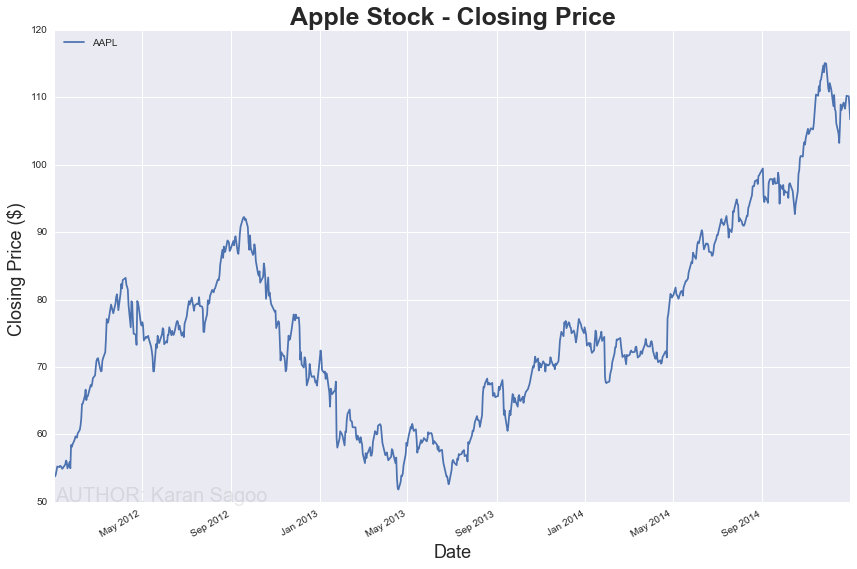

In [47]:
# plot AAPL


    
a = daily_close_px['AAPL'].plot(figsize=(12,8));
fillAndSavePlot1(a,title="Apple Stock - Closing Price", x="Date",y="Closing Price ($) ")

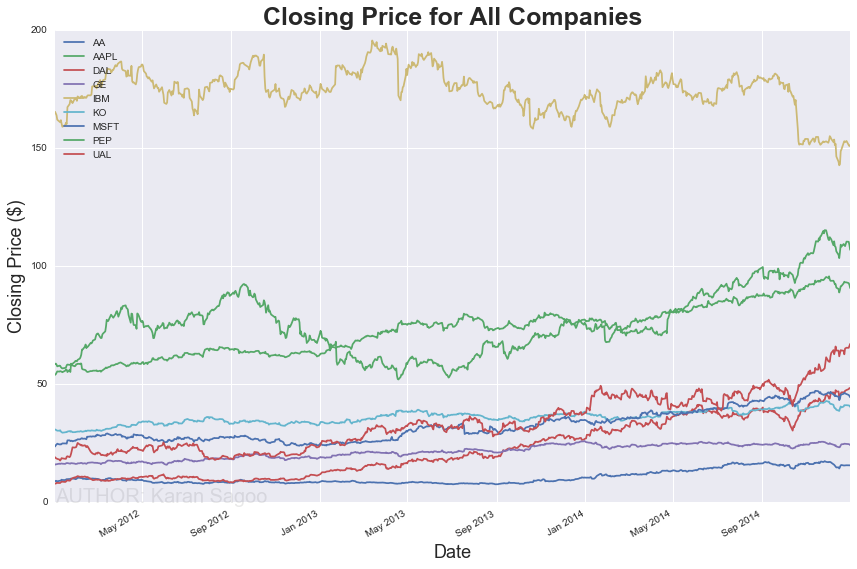

In [48]:
# plot all the stock closing prices against each other
_ = daily_close_px.plot(figsize=(12,8));
fillAndSavePlot(title = "Closing Price for All Companies",x="Date", y="Closing Price ($)")

Plotting Volume Series Data for Apple

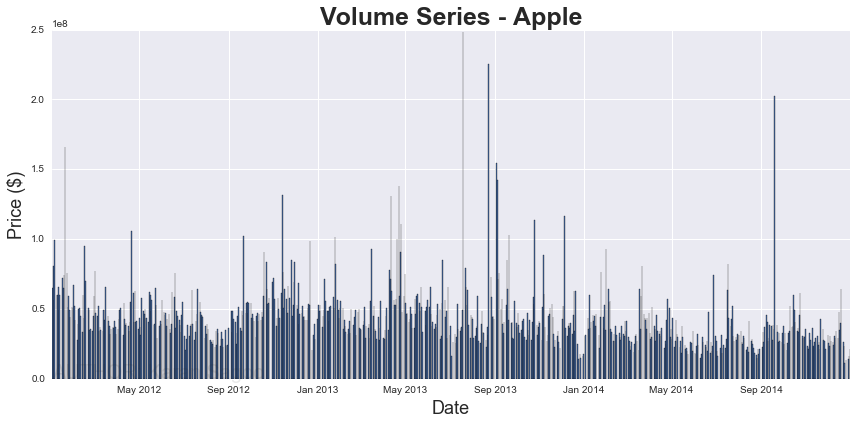

In [49]:
# get the daily volumes for MSFT
msftV = all_data.Volume.loc['MSFT']
# plot it
plt.bar(msftV.index, msftV)
# and set the plot size
plt.gcf().set_size_inches(12,6)
fillAndSavePlot(title="Volume Series - Apple", x="Date", y= "Price ($)")

## Combined Price and Volume
Plotting Stock trading volume relative to its closing price

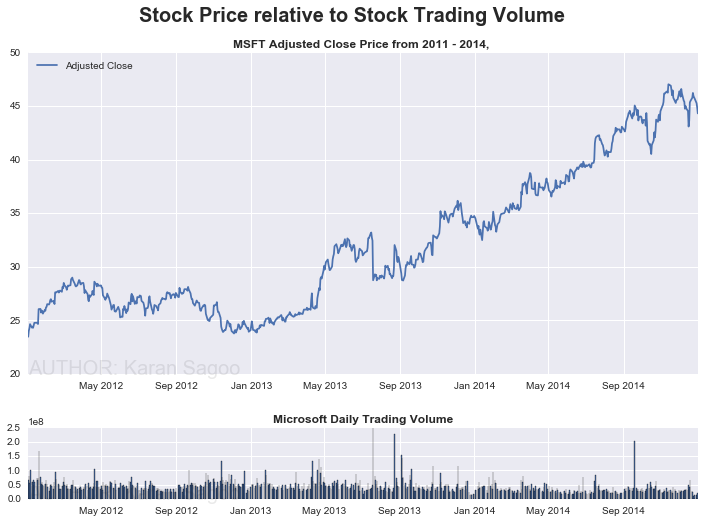

In [50]:
# draw a combined price vs volume graph
# subdivide the whole plot


def setLabels(title, x=False, y=False, titleSize = 18):
    
    plt.title (title, fontsize = titleSize,fontweight="bold")
    if type(x) == str:
        plt.xlabel(x,fontsize = 18)
    if type(y) == str:
        plt.ylabel(y, fontsize = 18)

    plt.annotate("AUTHOR: Karan Sagoo",xy = (0,0),xycoords='axes fraction',alpha = 0.1, fontsize = 20)
 
title = "Stock Price relative to Stock Trading Volume"

top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
# plot the price chart on the top
top.plot(daily_close_px.index, 
         daily_close_px['MSFT'], 
         label='Adjusted Close')
setLabels('MSFT Adjusted Close Price from 2011 - 2014, ',titleSize=12)
# plt.title('MSFT Adjusted Close Price from 2011 - 2014')
plt.suptitle(title,fontsize = 20,fontweight="bold")
plt.legend(loc=2)
# pick the bottom
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
# draw the bar at the bottom
bottom.bar(msftV.index, msftV)
setLabels('Microsoft Daily Trading Volume',titleSize=12)
# plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8) 
# set the size
plt.subplots_adjust(hspace=0.75)
plt.savefig(plotPath+title+".png", bbox_inches='tight', dpi=300)

## Plotting Candlestick charts 
OHLC and direction in one chart



In [51]:
# subset to MSFT in Dec 2014
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'] \
                 .reset_index() 
subset[:5];

In [52]:
# convert our dates matplotlib formatters representation
import matplotlib.dates as mdates
subset['date_num'] = subset['Date'] \
    .apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5];

In [53]:
# extract only values required, in order, as tuples
subset_as_tuples = [tuple(x) for x in subset[['date_num', 
                                              'Open', 
                                              'High', 
                                              'Low', 
                                              'Close']].values]
subset_as_tuples[:5];

In [54]:
# required imports for fomatting
from matplotlib.dates import DateFormatter
week_formatter = DateFormatter('%b %d')  # e.g., Jan 12

In [55]:
# We want to only display labels for Mondays
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY) # major ticks on the mondays

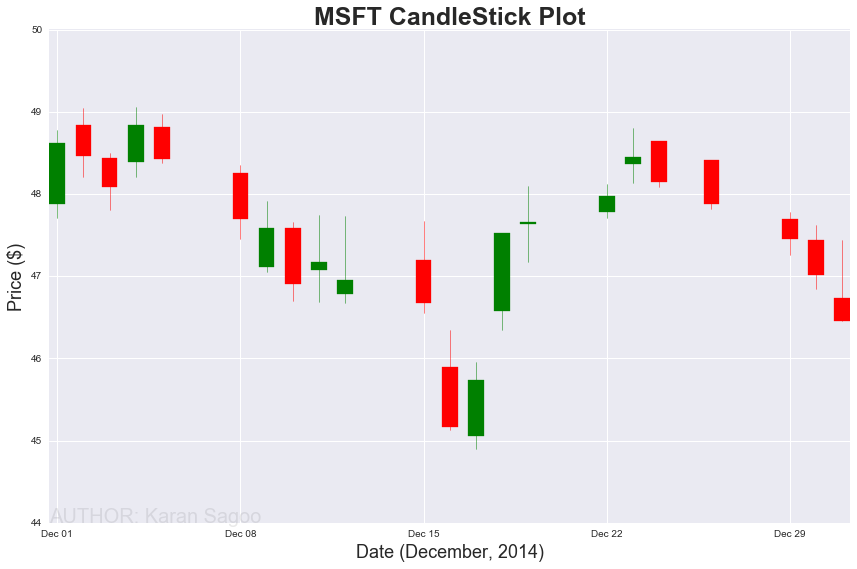

In [56]:
# now draw the plot


fig, ax = plt.subplots(figsize=(12, 8))
# set the locator and formatter for the x-axis
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)

# draw the candlesticks
from matplotlib.finance import candlestick_ohlc 
_ = candlestick_ohlc(ax, subset_as_tuples, width=0.6, 
                     colorup='g',colordown='r');

fillAndSavePlot(title="MSFT CandleStick Plot",x="Date (December, 2014)", y= "Price ($)")

Color of Bar represents whether the close price finshed above or below the open price. <br />
Green Bar reprerpesnts that there was a net profit during the day (finshed above the open price). <br />
Red Bar represents that there was a net profit the next day.<br />
The thin vertical line represents range of price flucatuation during that time.<br />
The thick bar represents the spacing between open and close prices.<br />

# Some Financial Calculations

## Daily Percent Change
### DPC = Amount of percent change of a value of stock over a single day of trading

In [57]:
# we can apply this to everything with the following using slices
dpc_1 = daily_close_px.iloc[1:] / \
        daily_close_px.iloc[:-1].values - 1
dpc_1.ix[:,'AA':'AAPL'][:3];

# to make this easy, pandas has .pct_change() baked in
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.fillna(0, inplace=True)

daily_pct_change.ix[:,0:2][:5];

# Daily cumulative returns
The cumulative daily rate of return is useful to determine the value of an investment
at regular intervals after investment. This is calculated from the daily percentage
change values by multiplying (1 + the current day's percentage change) with the
cumulative product of all of the previous values


In [58]:
# calc the cumulative daily returns 
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.ix[:,:2][:5]

Ticker,AA,AAPL
Date,,
2012-01-03,1.000,1.000
2012-01-04,1.024,1.005
2012-01-05,1.014,1.017
2012-01-06,0.992,1.027
2012-01-09,1.022,1.026


# Plotting Daily Cumulative Returns

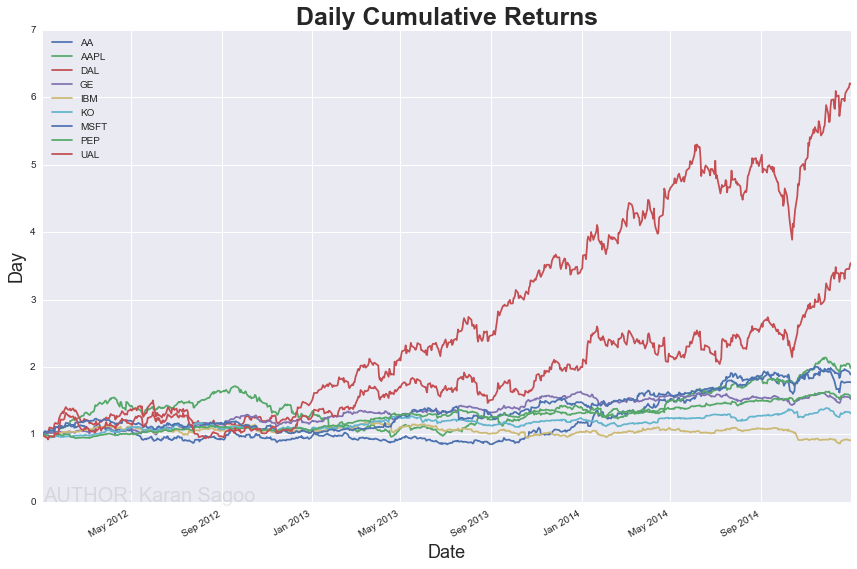

In [59]:
%matplotlib inline
cum_daily_return.plot(figsize=(12,8))

fillAndSavePlot(title="Daily Cumulative Returns",x = "Date", y = "Day", legendLOC=2)

## Analyzing the distribution of returns
Plotting distrubitons of daily retruns for particualr stock

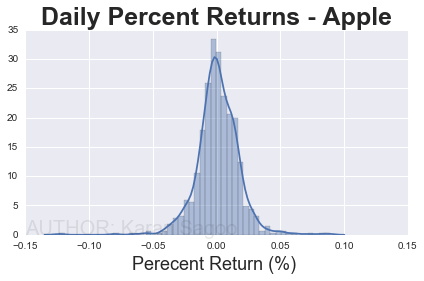

In [60]:
aapl = daily_pct_change['AAPL']
sns.distplot(aapl)
plt.rcParams['figure.figsize']=(12,8)

fillAndSavePlot(title="Daily Percent Returns - Apple",x="Perecent Return (%) ")

The Distrubition is normally distrubuted and centers around 0% return


In [61]:
aapl.describe()

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
25%     -7.365e-03
50%      4.987e-04
75%      1.095e-02
max      8.874e-02
Name: AAPL, dtype: float64

Means is close to 0.001051
SD is 0.01685
25% of the stock values fall below -0.0073
75% of stock values fall below 0.01095


## Calcualting Daily Return Range from teh past 3 years

In [62]:
aapl.describe(percentiles=[0.025, 0.5, 0.975])

count    7.540e+02
mean     1.051e-03
std      1.685e-02
min     -1.236e-01
2.5%    -3.191e-02
50%      4.987e-04
97.5%    3.171e-02
max      8.874e-02
Name: AAPL, dtype: float64

#### 95 percent confidence interval 
2.5 % values is -0.032 <br />
97.5% value is 0.034<br /> <br />


Therefore, the daily return on 95 periicent of the days will fall within  -0.032 percent and 0.032 percent.

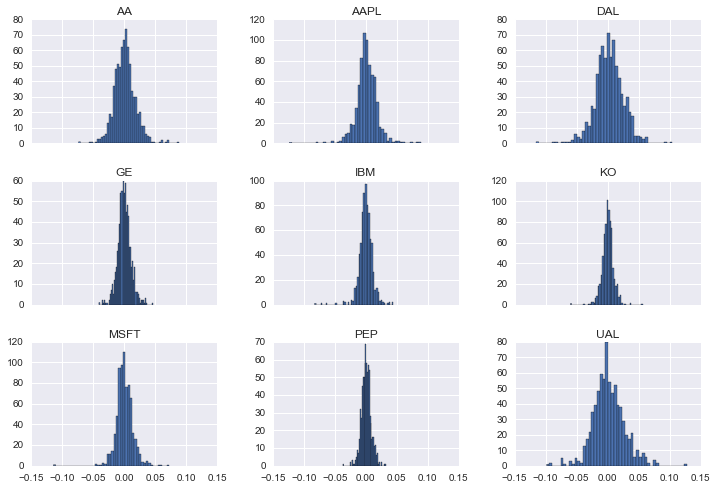

In [63]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('5104OS_05_10.png', bbox_inches='tight', dpi=300)

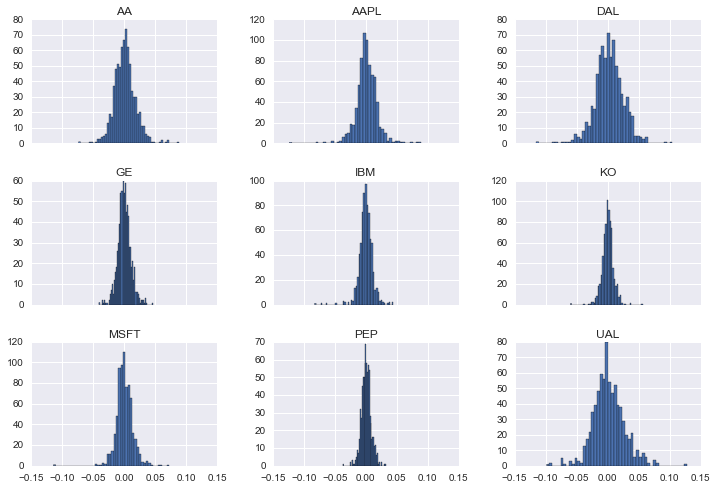

In [64]:
# plot all the cumulative return distributions
_ = daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8));
plt.savefig('Percent return for all Stocks', bbox_inches='tight', dpi=300)

Stocks where the curve is skewed demonstrate a propensity
to have either larger (skewed right) or smaller rates (skewed left) of return during
the period of measurement

## Ranking of Volatility of Stocks

In [65]:
std1 = []
for col in list(daily_pct_change.columns):
   
    temp = (col,daily_pct_change[col].std())
    std1.append(temp)

In [66]:
aq = pd.DataFrame.from_records(std1, columns=["stock", "Standard Deviation"], index = "stock")

In [67]:
aq["Standard Deviation"].sort_values()

stock
PEP     0.008
KO      0.009
GE      0.011
IBM     0.011
MSFT    0.014
AAPL    0.017
AA      0.017
DAL     0.023
UAL     0.026
Name: Standard Deviation, dtype: float64

We notice that PEP has the lowest fluctions in return and UAL has the highes fluctuations in returns

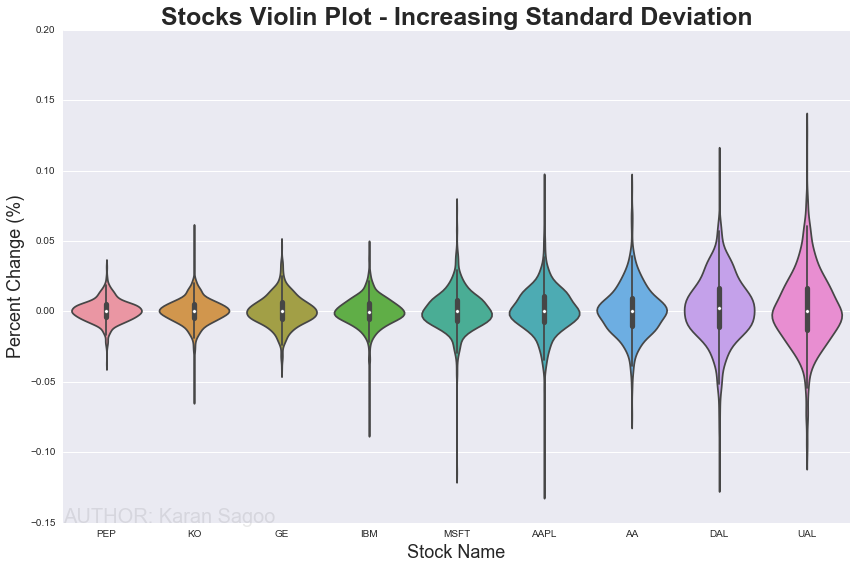

In [68]:
z = aq["Standard Deviation"].sort_values().to_frame()
d1 = daily_pct_change[list(z.index)].copy()
g = sns.violinplot(d1,scale="count")
fillAndSavePlot1(g,"Stocks Violin Plot - Increasing Standard Deviation",x= "Stock Name", y = "Percent Change (%)")

This plot gives us a very good comparison of the performance of these stocks over
this period of time. The wider the box, the higher the variability and the risk. The
closer the median line to either side of the box or the longer a whisker is than the
other, the greater the skew in the distribution

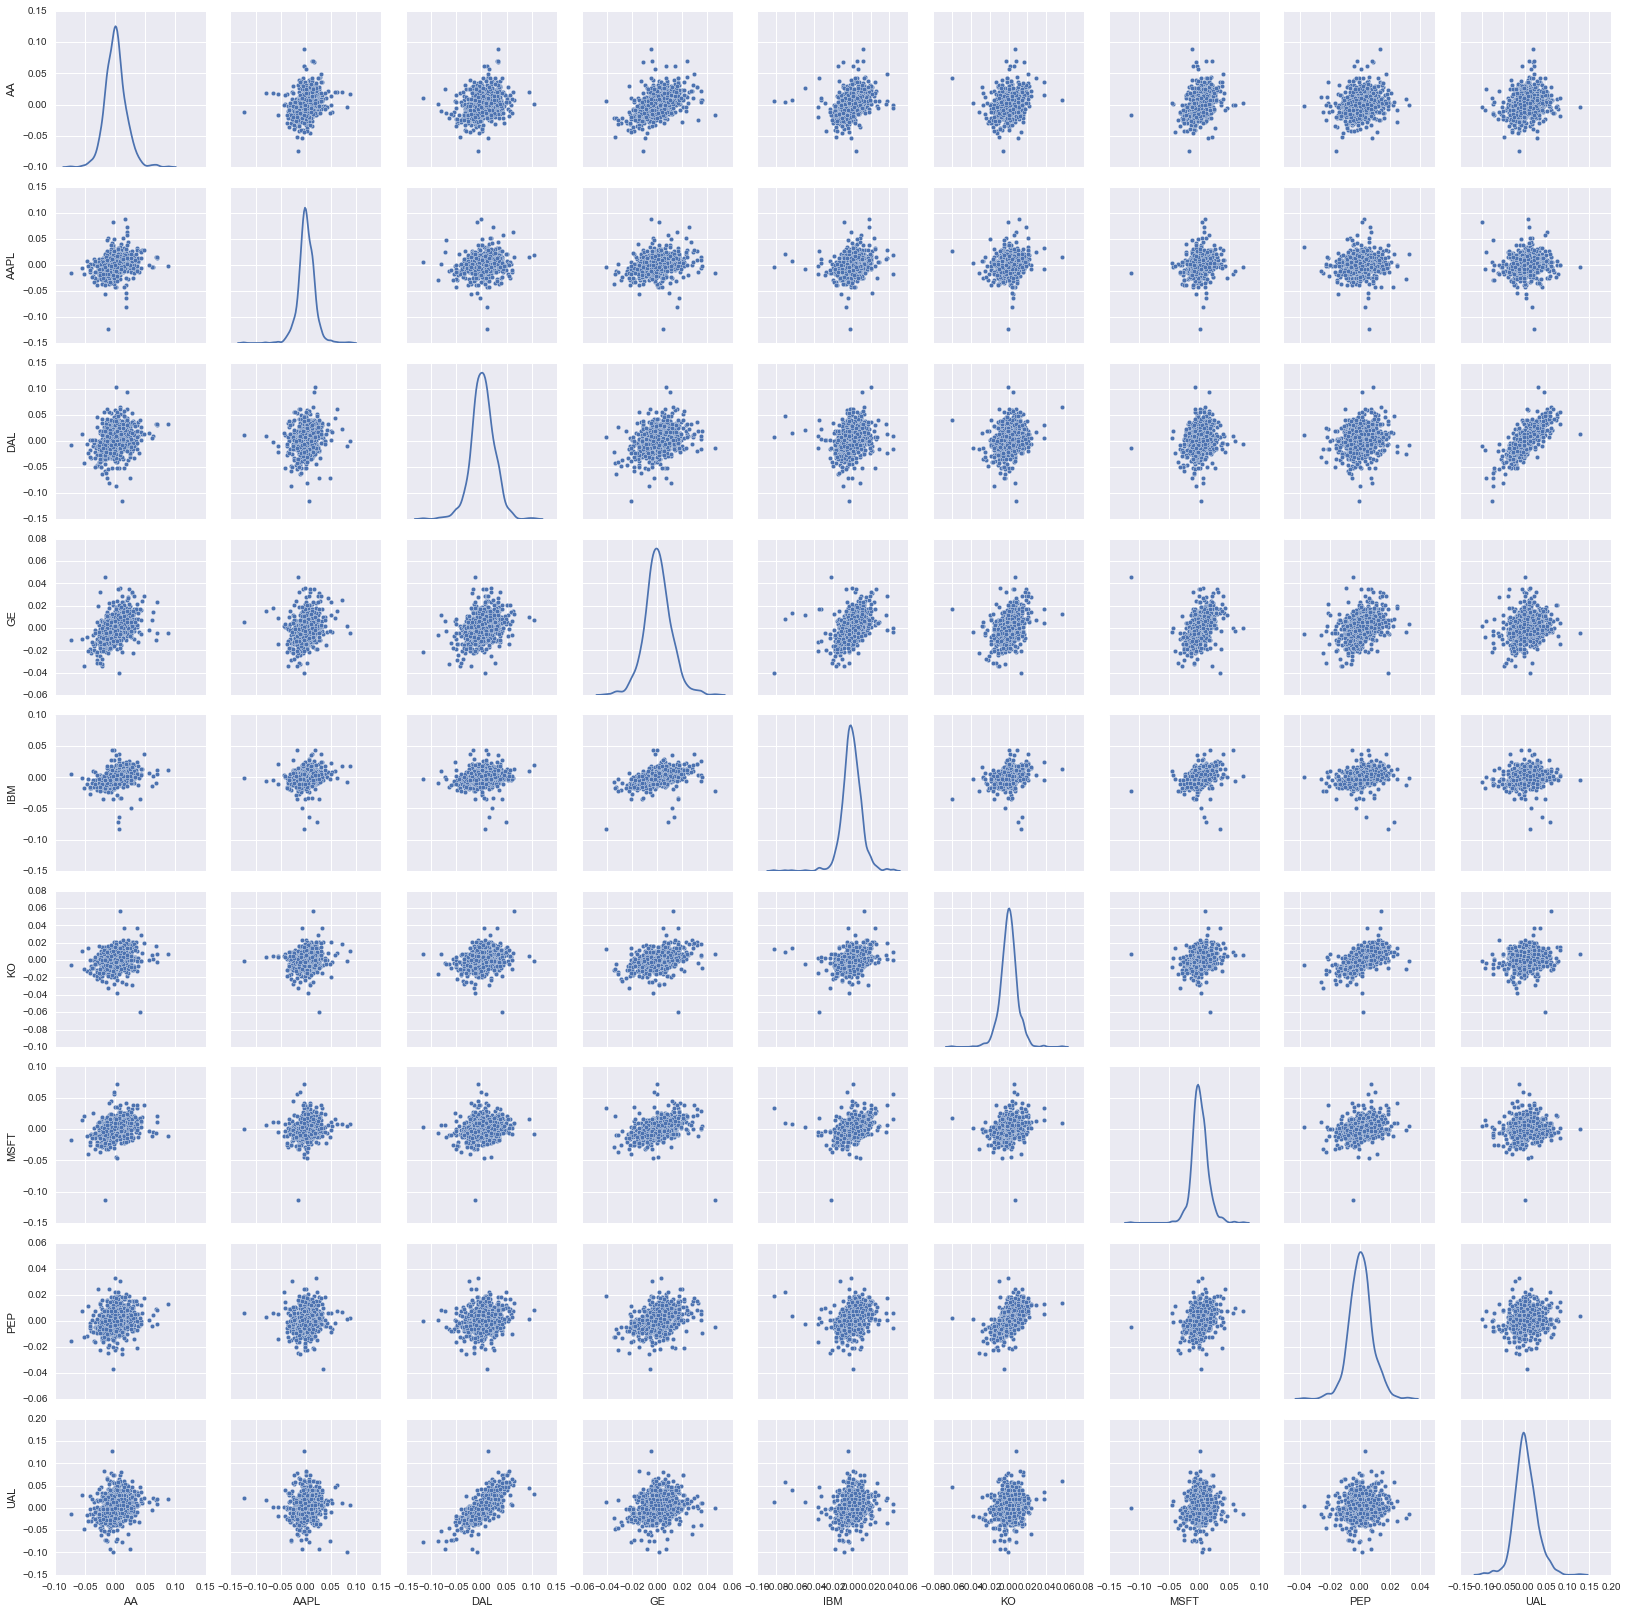

In [69]:
ax = sns.pairplot(daily_pct_change,diag_kind = "kde")

# Moving Windows (Rolling Statistics)
Used to smooth out fluctuations

In [70]:
msftAC = msft['2012']['Adj Close']
msftAC[:5]

Date
2012-01-03    23.462
2012-01-04    24.014
2012-01-05    24.259
2012-01-06    24.636
2012-01-09    24.312
Name: Adj Close, dtype: float64

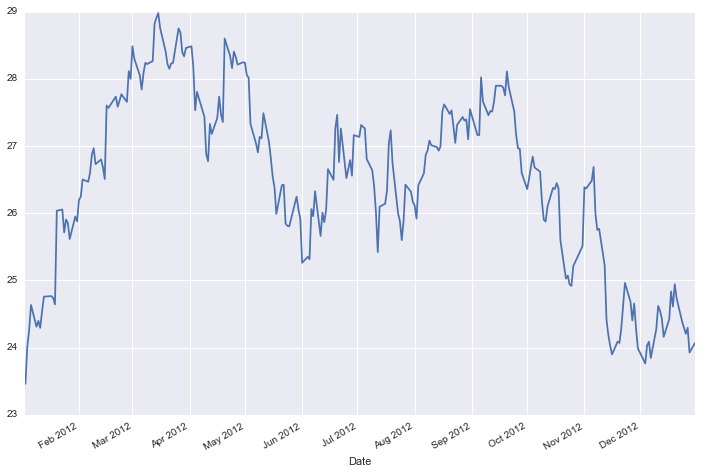

In [71]:
sample = msftAC['2012'] 
sample.plot(figsize=(12,8));
plt.savefig('5104OS_05_17.png', bbox_inches='tight', dpi=300)

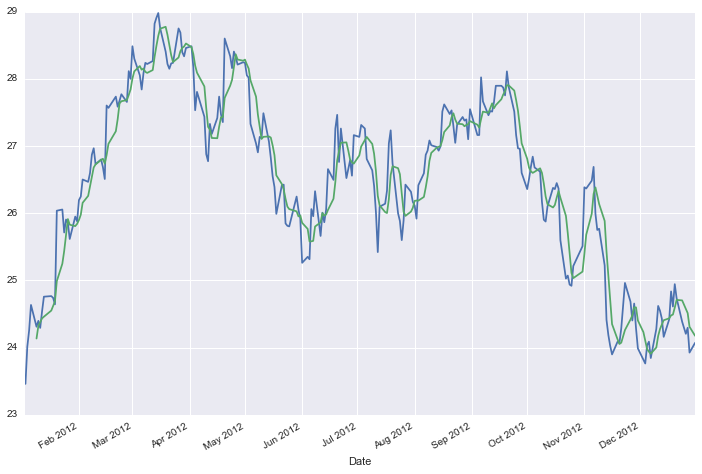

In [73]:
sample.plot(figsize=(12,8))
sample.rolling(window=5,center=False).mean().plot(figsize=(12,8));

We see that the window has smoothed out the fluctuations. Larger windows means more data is missing 

Calcuating how far the values are from overall mean 

C:\Users\Rig\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  from ipykernel import kernelapp as app


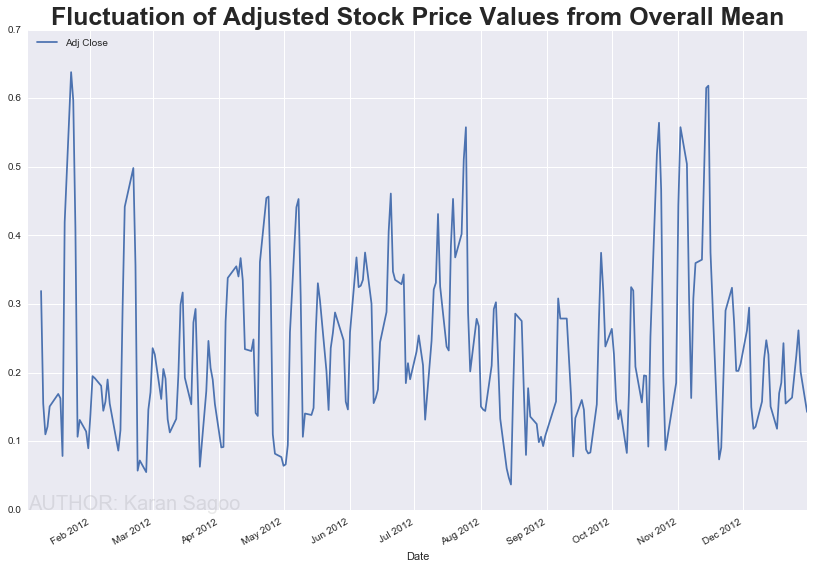

In [88]:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
ax = pd.rolling_apply(sample, 5, mean_abs_dev).plot(figsize=(12,8));
fillAndSavePlot1(ax,title="Fluctuation of Adjusted Stock Price Values from Overall Mean")

C:\Users\Rig\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.expanding_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.expanding(min_periods=1).mean()


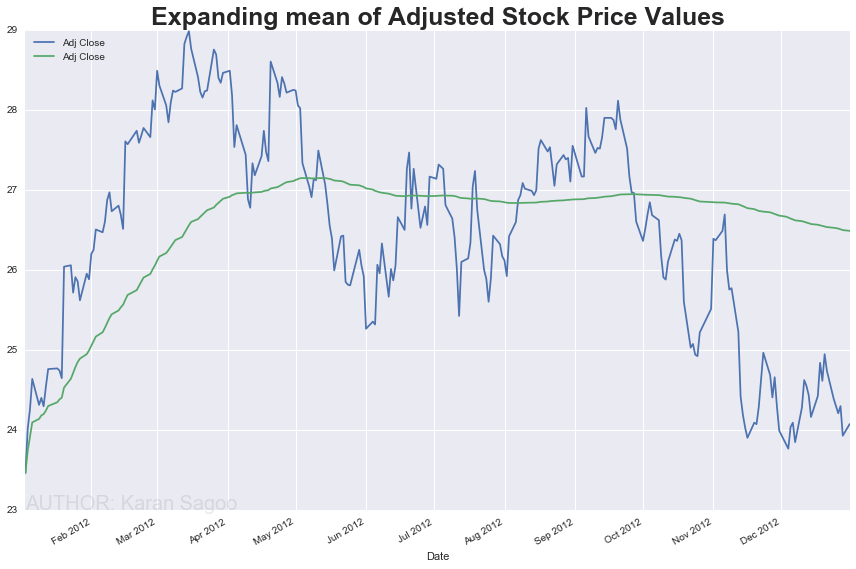

In [89]:
expanding_mean = lambda x: pd.rolling_mean(x, len(x), 
                                           min_periods=1)
sample.plot()
ax = pd.expanding_mean(sample).plot(figsize=(12,8));
fillAndSavePlot1(ax,title="Expanding mean of Adjusted Stock Price Values")

Expanding window mean will be more stable (less responsive) than
a rolling window because greater the size of the window, the less the impact of the
next value

# Measuring Volatility